##### **Load the Datasets**

In [1]:
import pandas as pd

data1 = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/marksheet.csv', encoding='utf-8')
data2 = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/insurance.csv', encoding='utf-8')

In [2]:
# dataset-1
data1.head()

,id,sex,attendance,class_test,mid_term,final
0,C001,Male,10,9,22,32
1,C002,Male,8,9,24,40
2,C003,Male,8,5,26,44
3,C004,Female,10,10,24,44
4,C005,Male,10,0,17,46


In [3]:
# dataset-2
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### **Preprocess Dataset**

**Convert Categorical Fields to Numerical**: In our dataset-1 we have a field `sex` which has non-numeric value. We have to convert them to numerical. Similarly, we have to convert `sex`, `smoker` and `region` fields for dataset-2.

In [4]:
# Dataset-1
data1['sex'] = data1['sex'].astype('category')  # First, convert the field `as type 'category'`
data1['sex'] = data1['sex'].cat.codes

# Dataset-2
data2['sex']=pd.Categorical(data2["sex"]).codes
data2['smoker']=pd.Categorical(data2["smoker"]).codes
data2['region']=pd.Categorical(data2["region"]).codes

In [5]:
data1.head()

,id,sex,attendance,class_test,mid_term,final
0,C001,1,10,9,22,32
1,C002,1,8,9,24,40
2,C003,1,8,5,26,44
3,C004,0,10,10,24,44
4,C005,1,10,0,17,46


In [6]:
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Check if there any `null` values**

In [7]:
data1.isnull().sum()

id            0
sex           0
attendance    0
class_test    0
mid_term      0
final         0
dtype: int64

`there is no null values in our dataset-1`

In [8]:
data2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

`there is no null values in our dataset-2 also`

##### **`Understanding MLR and Linked to Dataset`**
* **[Equation of Linear Line: `y = mx + c`]**
* In the simple linear regression we had one training feature `x` (coresponding with one co-eficient `m`). But in Multiple Linear Regression, we have several training features `x1, x2, x3, ..., xn`, so they will have several co-eficients `m1, m2, m3, ..., mn`.
* **Hence, the equation will be**: *`y = m1x1 + m2x2 + m3x3 + ... + mnxn + c`*
* In our dataset-1, we can consider `attendance`, `class_test` and `mid_term` as the training features and `final` as label. Similarly, in dataset-2, the training features would be `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges` would the the label.

##### **Setup `X` and `Y`**

In [9]:
# Dataset-1
x1 = data1[['attendance', 'class_test', 'mid_term']]
y1 = data1['final']

# Dataset-2
x2 = data2.drop(columns="charges")      # It selects all the columns except `charges`
y2 = data2['charges']

In [10]:
x1.head()

,attendance,class_test,mid_term
0,10,9,22
1,8,9,24
2,8,5,26
3,10,10,24
4,10,0,17


In [11]:
y1.head()

0    32
1    40
2    44
3    44
4    46
Name: final, dtype: int64

In [12]:
x2.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [13]:
y2.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**See Relationship among Data**

Text(0, 0.5, 'final')

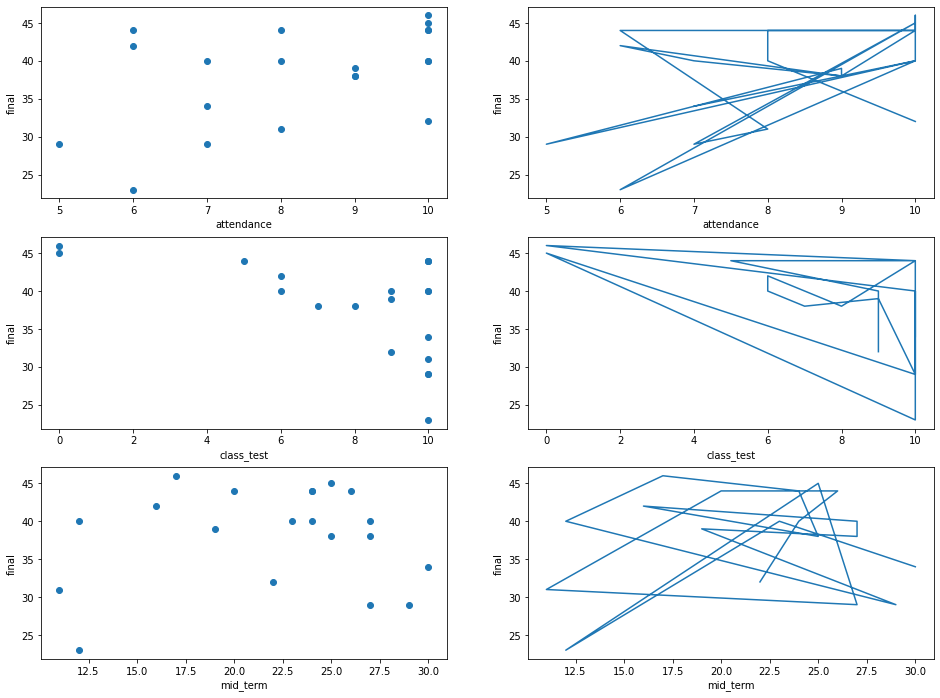

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,2, figsize=(16, 12))

# Scatter and Plot for 'attendance' vs 'final'
axs[0,0].scatter(x1['attendance'],y1)
axs[0,0].set_xlabel('attendance')
axs[0,0].set_ylabel('final')

axs[0,1].plot(x1['attendance'],y1)
axs[0,1].set_xlabel('attendance')
axs[0,1].set_ylabel('final')

# Scatter and Plot for 'class_test' vs 'final'
axs[1,0].scatter(x1['class_test'],y1)
axs[1,0].set_xlabel('class_test')
axs[1,0].set_ylabel('final')

axs[1,1].plot(x1['class_test'],y1)
axs[1,1].set_xlabel('class_test')
axs[1,1].set_ylabel('final')

# Scatter and Plot for 'mid_term' vs 'final'
axs[2,0].scatter(x1['mid_term'],y1)
axs[2,0].set_xlabel('mid_term')
axs[2,0].set_ylabel('final')

axs[2,1].plot(x1['mid_term'],y1)
axs[2,1].set_xlabel('mid_term')
axs[2,1].set_ylabel('final')
